In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, power_transform
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df.head() 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
round(df.describe(),2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


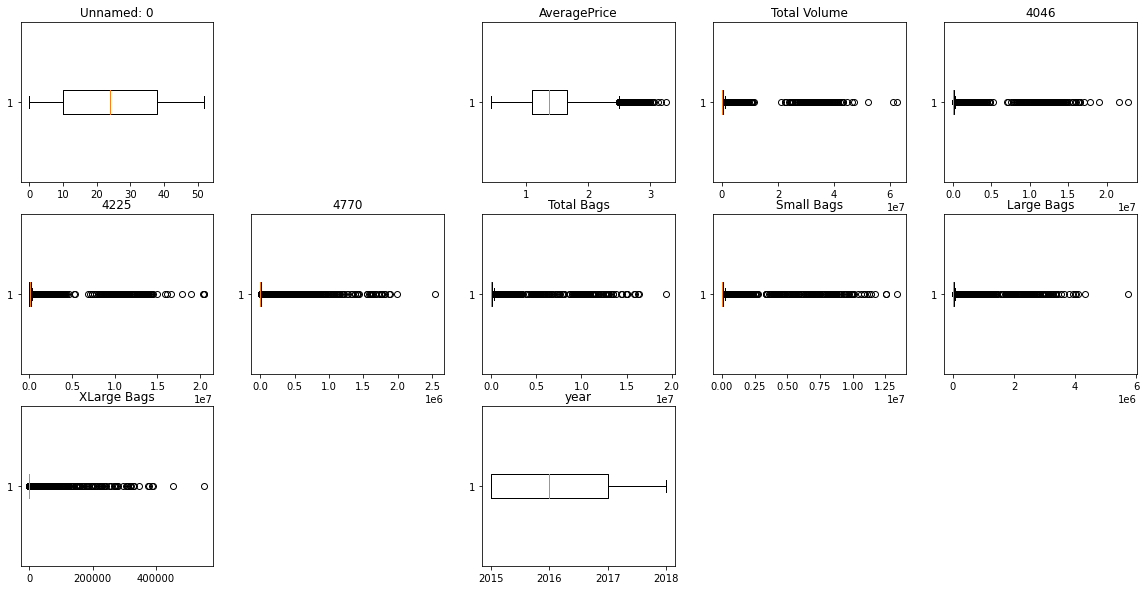

In [5]:
plt.figure(figsize=(20,10))

for col in range(len(df.columns)):
    if df.dtypes[col] != 'object':
        plt.subplot(3, 5, col+1)
        plt.boxplot(df[df.columns[col]], vert=False)
        plt.title(df.columns[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA8EA1130>,
      dtype=object)

<Figure size 1440x720 with 0 Axes>

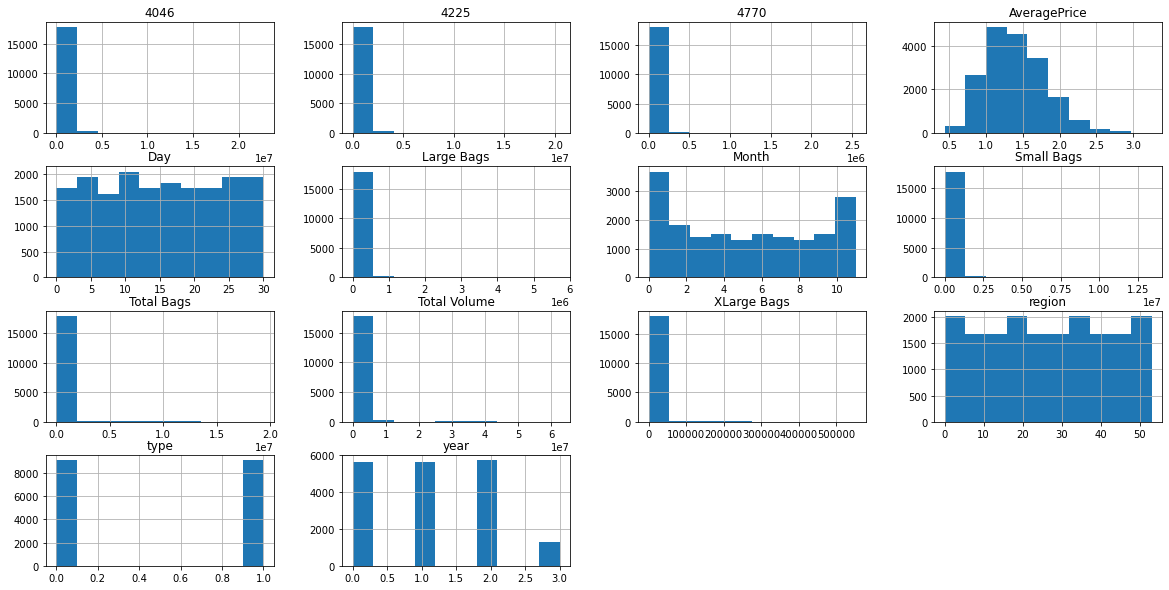

In [65]:
plt.figure(figsize=(20,10))
df.hist(figsize=(20,10))

In [6]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
df = df.drop('Date', axis=1)

In [13]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [14]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [16]:
df.hist()

In [17]:
le = LabelEncoder()
df['type'] = pd.DataFrame(le.fit_transform(df['type']))

In [18]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29


In [19]:
df['region'] = le.fit_transform(df['region'])

In [20]:
df['year'] = le.fit_transform(df['year'])

In [21]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,11,29


In [22]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,3,53,1,7


In [23]:
df['Month'] = le.fit_transform(df['Month'])
df['Day'] = le.fit_transform(df['Day'])

In [24]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,11,26
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,11,19
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,11,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,11,5
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,10,28


In [25]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,53,1,3
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53,0,27
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53,0,20
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53,0,13
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,3,53,0,6


In [26]:
from scipy.stats import zscore
z = np.abs(zscore(df))
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [27]:
z[346][2]

3.199410614794124

In [28]:
z[17428][0]

4.38086076813336

In [29]:
df_new = df[(z<=3).all(axis=1)]

In [30]:
df.shape

(18249, 14)

In [31]:
df_new.shape

(17651, 14)

In [32]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,11,26
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,11,19
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,11,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,11,5
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,53,1,3
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53,0,27
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53,0,20
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53,0,13


In [33]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [34]:
X1 = df_new.drop('AveragePrice', axis=1)
y1 = df_new['AveragePrice']

In [35]:
X1.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,11,26
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,11,19
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,11,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,11,5
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,10,28


In [36]:
X1.shape

(17651, 13)

In [37]:
y1.shape

(17651,)

In [38]:
y1 = y1.values.reshape(-1,1)

In [39]:
y1.shape

(17651, 1)

In [40]:
scaler = StandardScaler()
scaledX1 = pd.DataFrame(scaler.fit_transform(X1))
scaledX1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.019047,-1.210013,-1.695495,1.644612,1.289309
1,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.019047,-1.210013,-1.695495,1.644612,0.491652
2,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.019047,-1.210013,-1.695495,1.644612,-0.306004
3,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.019047,-1.210013,-1.695495,1.644612,-1.103660
4,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.019047,-1.210013,-1.695495,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.438579,-0.347153,-0.411112,-0.323616,-0.412326,-0.381520,-0.375195,-0.259027,0.981309,1.980756,1.747054,-1.180379,-1.331562
17647,-0.441726,-0.349099,-0.406345,-0.323616,-0.427335,-0.399501,-0.376661,-0.259027,0.981309,1.980756,1.747054,-1.462878,1.403260
17648,-0.441846,-0.349098,-0.408798,-0.302508,-0.426876,-0.397707,-0.380529,-0.259027,0.981309,1.980756,1.747054,-1.462878,0.605603
17649,-0.439438,-0.348335,-0.407474,-0.302535,-0.421292,-0.390876,-0.380424,-0.259027,0.981309,1.980756,1.747054,-1.462878,-0.192053


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate = 0
accu = 0

for i in range(30, 300):
    X1_train, X1_test, y1_train, y1_test = train_test_split(scaledX1, y1, test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(X1_train, y1_train)
    y1_pred = mod.predict(X1_test)
    tempaccu = r2_score(y1_test, y1_pred)
    if tempaccu > accu:
        accu = tempaccu
        best_rstate = i


print(f'The best accuracy {accu*100} found at random state {best_rstate}')

The best accuracy 46.52454457523043 found at random state 106


In [42]:
X1_train, X1_test, y1_train, y1_test = train_test_split(scaledX1, y1, test_size = .25, random_state = 106)

In [43]:
lr = LinearRegression()
lr.fit(X1_train, y1_train)
y1_pred = lr.predict(X1_test)
r2score = r2_score(y1_test, y1_pred)
cvscore = cross_val_score(LinearRegression(), X1_train, y1_train, cv=5).mean()
print(f'Accuracy = {r2score*100}, CrossvalScore = {cvscore*100} and diff = {(r2score*100) - (cvscore*100)}')

Accuracy = 46.52454457523043, CrossvalScore = 43.382283688391134 and diff = 3.1422608868392956


In [44]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X1_train, y1_train)
y1_pred = RF.predict(X1_test)
r2score = r2_score(y1_test, y1_pred)
cvscore = cross_val_score(RandomForestRegressor(), X1_train, y1_train, cv=5).mean()
print(f'Accuracy = {r2score*100}, CrossvalScore = {cvscore*100} and diff = {(r2score*100) - (cvscore*100)}')

Accuracy = 88.3698739610678, CrossvalScore = 87.30925362297684 and diff = 1.0606203380909562


In [45]:
from sklearn.ensemble import AdaBoostRegressor
ADB = AdaBoostRegressor()
ADB.fit(X1_train, y1_train)
y1_pred = ADB.predict(X1_test)
r2score = r2_score(y1_test, y1_pred)
cvscore = cross_val_score(AdaBoostRegressor(), X1_train, y1_train, cv=5).mean()
print(f'Accuracy = {r2score*100}, CrossvalScore = {cvscore*100} and diff = {(r2score*100) - (cvscore*100)}')

Accuracy = 57.090173578681714, CrossvalScore = 55.2252500417304 and diff = 1.8649235369513164


In [46]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()
SGD.fit(X1_train, y1_train)
y1_pred = SGD.predict(X1_test)
r2score = r2_score(y1_test, y1_pred)
cvscore = cross_val_score(SGDRegressor(), X1_train, y1_train, cv=5).mean()
print(f'Accuracy = {r2score*100}, CrossvalScore = {cvscore*100} and diff = {(r2score*100) - (cvscore*100)}')

Accuracy = 46.20801468316434, CrossvalScore = 43.27793759933042 and diff = 2.930077083833922


In [47]:
import xgboost as xgb
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xg.fit(X1_train, y1_train)
y1_pred = xg.predict(X1_test)
r2score = r2_score(y1_test, y1_pred)
cvscore = cross_val_score(XGBRegressor(n_estimators = 1000, learning_rate = 0.05), X1_train, y1_train, cv=5).mean()
print(f'Accuracy = {r2score*100}, CrossvalScore = {cvscore*100} and diff = {(r2score*100) - (cvscore*100)}')


Accuracy = 91.39099006169268, CrossvalScore = 90.80374761101513 and diff = 0.5872424506775502


In [48]:
parameters = {'max_iter': [500, 700, 900, 1100, 1300, 1400, 1500],
              'alpha': [0.0001, 0.001, 0.1, 1, 10, 100],
              'penalty': ['elasticnet', 'l1', 'l2']}

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
import joblib
joblib.dump(xg, 'avocado_price.pkl')

['avocado_price.pkl']

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [52]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,11,26
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,11,19
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,11,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,11,5
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,10,28


In [53]:
X2 = df_new.drop('region', axis=1)
y2 = df_new['region']

In [54]:
X2.shape

(17651, 13)

In [55]:
y2.shape

(17651,)

In [56]:
y2 = y2.values.reshape(-1,1)

In [57]:
scaledX2 = pd.DataFrame(scaler.fit_transform(X2))
scaledX2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.195352,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.019047,-1.210013,1.644612,1.289309
1,-0.143510,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.019047,-1.210013,1.644612,0.491652
2,-1.232207,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.019047,-1.210013,1.644612,-0.306004
3,-0.843387,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.019047,-1.210013,1.644612,-1.103660
4,-0.324959,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.438579,-0.347153,-0.411112,-0.323616,-0.412326,-0.381520,-0.375195,-0.259027,0.981309,1.980756,-1.180379,-1.331562
17647,0.789660,-0.441726,-0.349099,-0.406345,-0.323616,-0.427335,-0.399501,-0.376661,-0.259027,0.981309,1.980756,-1.462878,1.403260
17648,1.204402,-0.441846,-0.349098,-0.408798,-0.302508,-0.426876,-0.397707,-0.380529,-0.259027,0.981309,1.980756,-1.462878,0.605603
17649,1.359930,-0.439438,-0.348335,-0.407474,-0.302535,-0.421292,-0.390876,-0.380424,-0.259027,0.981309,1.980756,-1.462878,-0.192053


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [59]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaledX2, y2, test_size = .25, random_state = 106)

In [60]:
svc = SVC(kernel='rbf')
svc.fit(X2_train, y2_train)
svc.score(X2_train, y2_train)
predsvc = svc.predict(X2_test)
print(accuracy_score(y2_test, predsvc))
print(confusion_matrix(y2_test, predsvc))
print(classification_report(y2_test, predsvc))

0.3650577838205302
[[16  0  1 ...  0  0  0]
 [ 0 28  0 ...  0  0  1]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  1 60  0]
 [ 0  1  0 ...  0  0 42]]
              precision    recall  f1-score   support

           0       0.25      0.17      0.21        93
           1       0.61      0.33      0.43        84
           2       0.45      0.55      0.49        75
           3       0.28      0.41      0.33        74
           4       0.71      0.39      0.50        77
           5       0.28      0.22      0.24        79
           6       0.71      0.50      0.59        74
           7       0.14      0.20      0.16        82
           8       0.29      0.58      0.39        76
           9       0.58      0.39      0.47        79
          10       0.30      0.15      0.20        91
          11       0.75      0.30      0.43        90
          12       0.44      0.66      0.53        86
          13       0.40      0.44      0.42        84
          14  

In [61]:
knn = KNeighborsClassifier()
knn.fit(X2_train, y2_train)
knn.score(X2_train, y2_train)
predknn = knn.predict(X2_test)
print(accuracy_score(y2_test, predknn))
print(confusion_matrix(y2_test, predknn))
print(classification_report(y2_test, predknn))

0.2349875368230229
[[ 6  9  4 ...  0  0  0]
 [ 5 32  2 ...  0  0  0]
 [ 2  3 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 46  3  0]
 [ 0  3  2 ...  0 47  0]
 [ 4 10  0 ...  0  0 26]]
              precision    recall  f1-score   support

           0       0.02      0.06      0.03        93
           1       0.11      0.38      0.17        84
           2       0.16      0.47      0.24        75
           3       0.06      0.24      0.09        74
           4       0.08      0.19      0.11        77
           5       0.04      0.09      0.05        79
           6       0.44      0.53      0.48        74
           7       0.08      0.16      0.11        82
           8       0.28      0.54      0.37        76
           9       0.17      0.33      0.23        79
          10       0.05      0.10      0.07        91
          11       0.22      0.30      0.25        90
          12       0.47      0.56      0.51        86
          13       0.26      0.43      0.33        84
          14  

In [62]:
svc = SVC(kernel='poly')
svc.fit(X2_train, y2_train)
svc.score(X2_train, y2_train)
predsvc = svc.predict(X2_test)
print(accuracy_score(y2_test, predsvc))
print(confusion_matrix(y2_test, predsvc))
print(classification_report(y2_test, predsvc))

0.20099705415816904
[[ 0  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  2 30  0]
 [ 0  3  0 ...  0  0 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.25      0.06      0.10        84
           2       0.53      0.33      0.41        75
           3       0.00      0.00      0.00        74
           4       0.09      0.21      0.12        77
           5       0.06      0.46      0.11        79
           6       1.00      0.35      0.52        74
           7       0.07      0.07      0.07        82
           8       0.98      0.53      0.68        76
           9       0.44      0.14      0.21        79
          10       0.00      0.00      0.00        91
          11       0.86      0.28      0.42        90
          12       0.78      0.42      0.55        86
          13       0.89      0.37      0.52        84
          14 

In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X2_train, y2_train)
dtc.score(X2_train, y2_train)
preddtc = dtc.predict(X2_test)
print(accuracy_score(y2_test, preddtc))
print(confusion_matrix(y2_test, preddtc))
print(classification_report(y2_test, preddtc))

0.7838205302515295
[[74  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  1]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  1 68  0]
 [ 0  0  0 ...  0  0 61]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        93
           1       0.75      0.81      0.78        84
           2       0.83      0.89      0.86        75
           3       0.76      0.77      0.77        74
           4       0.87      0.84      0.86        77
           5       0.68      0.76      0.72        79
           6       0.91      0.91      0.91        74
           7       0.82      0.79      0.81        82
           8       0.87      0.91      0.89        76
           9       0.81      0.78      0.79        79
          10       0.67      0.75      0.71        91
          11       0.88      0.87      0.87        90
          12       0.87      0.85      0.86        86
          13       0.77      0.79      0.78        84
          14  

In [64]:
import joblib
joblib.dump(dtc, 'avocado_region.pkl')

['avocado_region.pkl']